#### Load Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import MarkerCluster

In [2]:
#Create a DataFrame
tanz = pd.read_csv('training.csv')

In [3]:
tanz.head(3)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2


### Rename columns accordingly

In [4]:
tanz=tanz.rename(columns ={'Q1':'Age','Q2':'Gender','Q3':'Marital_status','Q4':'Level_of_education',
                               'Q5':'Land_ownership','Q6':'Other_land_ownership','Q7':'Owning_a_mobile_phone',
                               'Q9':'Employer','Q10':'Product_sold','Q11':'Service_provided','Q13':'sending_money_out_date'
                               ,'Q15':'recent_date_money_recieved','Q14':'cash_recieved_non_domestically','Q16':'purchasing_frequency_for_using_mobile_money'
                               ,'Q17':'bill_frequency_for_using_mobile_money','Q18':'Literacy_in_Kiswhahili','Q19':'English_literacy',
                                             'Q8_1':'Salaries',"Q8_2":'Trading','Q8_3':'Service','Q8_4':'Casual_work','Q8_5':'Rental','Q8_6':'Interest',
                                             'Q8_7':'Pension','Q8_8':'Social_welfare','Q8_9':'Dependent','Q8_10':'Dont_get_money','Q8_11':'Other'
                              })

In [5]:
tanz.head(3)

,ID,Age,Gender,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,...,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2


In [6]:
gen={1:'Male',2:'Female'}
tanz['Gender']=tanz.Gender.map(gen)

mm = {0:'no mobile and no service',1:'no mobile and atleast one service',2:'mobile only',3:'mobile and atleast one service'}
tanz['mobile_money_classification']=tanz.mobile_money_classification.map(mm)

time_period = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['sending_money_out_date']=tanz.sending_money_out_date.map(time_period)

received = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['recent_date_money_recieved']=tanz.recent_date_money_recieved.map(received)

In [7]:
# date = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
# tanz['sending_money_out_date']=tanz.sending_money_out_date.map(date)

### Data Inspection

#### Examining Dataset for any missing values

In [8]:
tanz.isnull().sum()

ID                                             0
Age                                            0
Gender                                         0
Marital_status                                 0
Level_of_education                             0
Land_ownership                                 0
Other_land_ownership                           0
Owning_a_mobile_phone                          0
Salaries                                       0
Trading                                        0
Service                                        0
Casual_work                                    0
Rental                                         0
Interest                                       0
Pension                                        0
Social_welfare                                 0
Dependent                                      0
Dont_get_money                                 0
Other                                          0
Employer                                       0
Product_sold        

Our dataset doesn't have any missing values. Everything is accounted for

In [9]:
tanz.describe()

,ID,Age,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,Service,...,purchasing_frequency_for_using_mobile_money,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,...,1.951508,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,...,1.580819,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000
max,9459.000000,100.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000


From this table we can see the number of observations (count), the mean,standard deviation,min&max and percentiles for each column.

## Visual EDA

#### Financial services accessed.

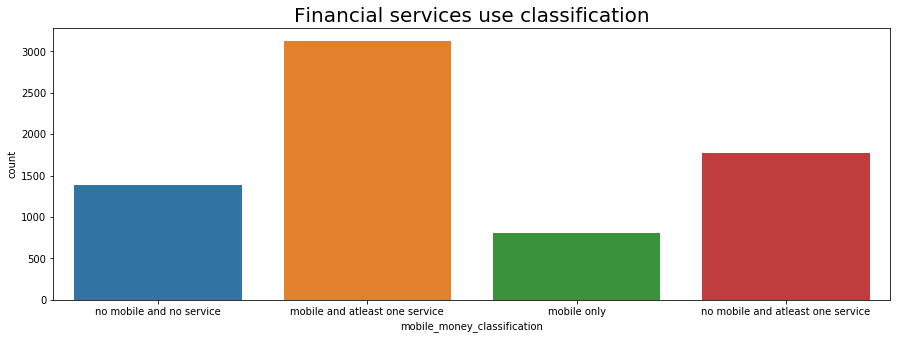

In [10]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='mobile_money_classification',data=tanz)
plt.title('Financial services use classification',fontdict=fontdict)
plt.show()


The plot shows that most people use mobile and atleast one other financial service.

### Financial services classification and Age

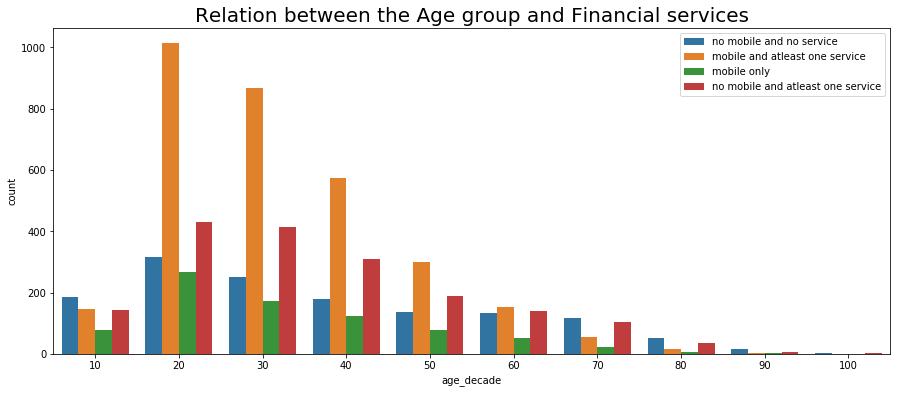

In [11]:
tanz['age_decade']=tanz.Age.apply(lambda x : int(x/10)*10)
plt.figure(figsize=(15,6))
fontdict={'fontsize':20}
sns.countplot(x='age_decade',hue='mobile_money_classification',data = tanz)
plt.legend(loc='upper right')
plt.title('Relation between the Age group and Financial services',fontdict=fontdict)
plt.show()

People within the 20 & 30 year old age group mostly use mobile money and another financial service. The reason could be that they have access to mobile devices.

### Financial services classification and Gender

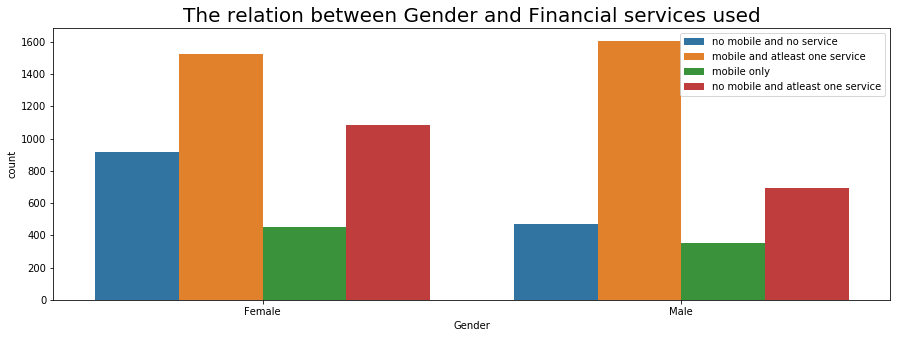

In [12]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Gender',hue='mobile_money_classification',data=tanz)
plt.legend(loc='upper right')
plt.title('The relation between Gender and Financial services used',fontdict=fontdict)
plt.show()

Females use more mobile money than Males.

### Financial services classification and Marital Status

In [13]:
status = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
tanz['Marital_status']=tanz.Marital_status.map(status)

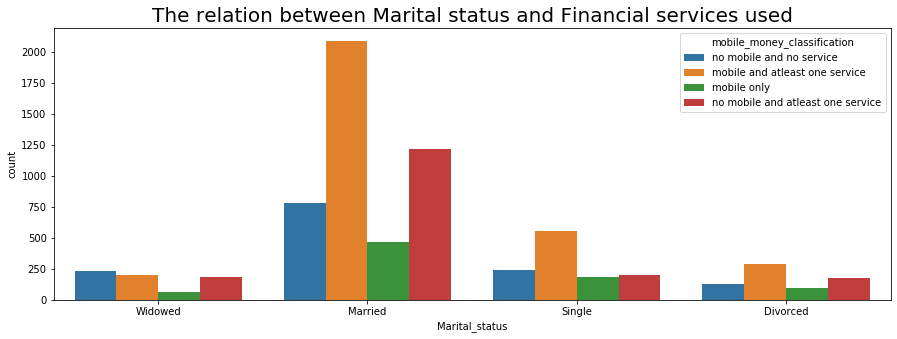

In [14]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=tanz)
plt.title('The relation between Marital status and Financial services used',fontdict=fontdict)
plt.show()

Married people have the highest occurence of using mobile money and at leats one other service. this could be attributed to the increased responsibility of joint living and family obligations.

### Financial services classification and Land ownership

In [15]:
land = {1:'Yes',2:'No'}
tanz['Other_land_ownership']=tanz.Other_land_ownership.map(land)

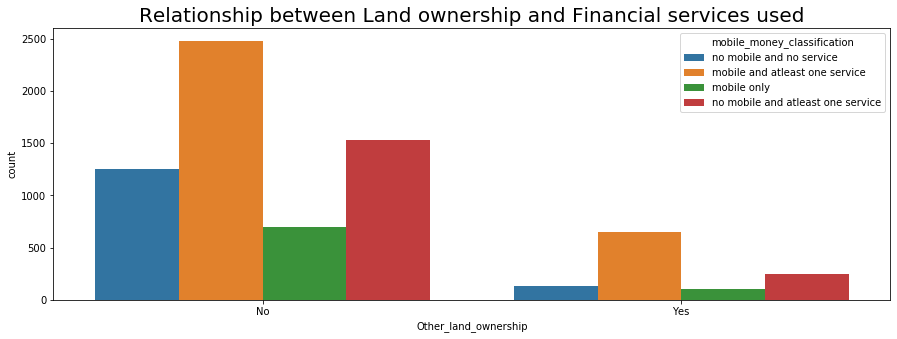

In [16]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=tanz)
plt.title('Relationship between Land ownership and Financial services used',fontdict=fontdict)
plt.show()

###  Financial services classification and the Types of income

In [17]:
tanz.columns

Index(['ID', 'Age', 'Gender', 'Marital_status', 'Level_of_education',
       'Land_ownership', 'Other_land_ownership', 'Owning_a_mobile_phone',
       'Salaries', 'Trading', 'Service', 'Casual_work', 'Rental', 'Interest',
       'Pension', 'Social_welfare', 'Dependent', 'Dont_get_money', 'Other',
       'Employer', 'Product_sold', 'Service_provided', 'Q12',
       'sending_money_out_date', 'cash_recieved_non_domestically',
       'recent_date_money_recieved',
       'purchasing_frequency_for_using_mobile_money',
       'bill_frequency_for_using_mobile_money', 'Literacy_in_Kiswhahili',
       'English_literacy', 'Latitude', 'Longitude', 'mobile_money', 'savings',
       'borrowing', 'insurance', 'mobile_money_classification', 'age_decade'],
      dtype='object')

In [18]:
tanz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 38 columns):
ID                                             7094 non-null int64
Age                                            7094 non-null int64
Gender                                         7094 non-null object
Marital_status                                 7094 non-null object
Level_of_education                             7094 non-null int64
Land_ownership                                 7094 non-null int64
Other_land_ownership                           7094 non-null object
Owning_a_mobile_phone                          7094 non-null int64
Salaries                                       7094 non-null int64
Trading                                        7094 non-null int64
Service                                        7094 non-null int64
Casual_work                                    7094 non-null int64
Rental                                         7094 non-null int64
Interest           

In [19]:
tanz.mobile_money_classification.value_counts()

mobile and atleast one service       3126
no mobile and atleast one service    1778
no mobile and no service             1386
mobile only                           804
Name: mobile_money_classification, dtype: int64

In [20]:
df_inc = tanz[['Salaries', 'Trading', 'Service', 'Casual_work', 'Rental', 'Interest', 
                            'Pension', 'Social_welfare', 'Dependent', 'Dont_get_money', 'Other',
              'mobile_money', 'mobile_money_classification']]

In [21]:
# df_other = pd.melt(df, id_vars=['Distillery', 'Clusters'],
#         var_name='Taste Profiles', value_name='Value of TP')

In [22]:
df_other = pd.melt(df_inc, id_vars=['mobile_money_classification', 'mobile_money'],
                   var_name='Type of Income', value_name='val')

In [23]:
df_other

,mobile_money_classification,mobile_money,Type of Income,val
0,no mobile and no service,0,Salaries,0
1,mobile and atleast one service,1,Salaries,1
2,mobile only,1,Salaries,0
3,mobile and atleast one service,1,Salaries,0
4,mobile and atleast one service,1,Salaries,0
...,...,...,...,...
78029,no mobile and atleast one service,0,Other,0
78030,mobile and atleast one service,1,Other,0
78031,no mobile and no service,0,Other,0
78032,mobile and atleast one service,1,Other,0


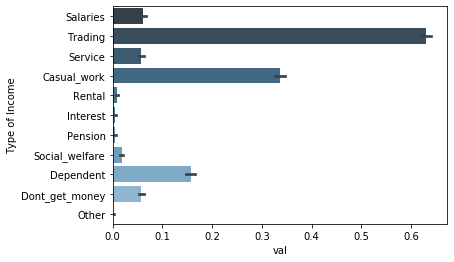

In [24]:
ax = sns.barplot("val", y="Type of Income", data=df_other,
                 palette="Blues_d")

In [25]:
data_frame = tanz[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]

In [26]:
data_frame_melt

,mobile_money_classification,Latitude,Longitude,sending_money_out_date,Gender,recent_date_money_recieved,variable,value
0,no mobile and no service,-4.460442,29.811396,N/A,Female,N/A,Salaries,0
1,mobile and atleast one service,-6.176438,39.244871,Past 90 days,Male,More than 90 days but less than 6 months,Salaries,1
2,mobile only,-6.825702,37.652798,N/A,Female,N/A,Salaries,0
3,mobile and atleast one service,-3.372049,35.808307,Past 7 days,Male,N/A,Salaries,0
4,mobile and atleast one service,-7.179645,31.039095,N/A,Male,Yesterday/Today,Salaries,0
...,...,...,...,...,...,...,...,...
78029,no mobile and atleast one service,-5.811335,35.098103,N/A,Female,N/A,Other,0
78030,mobile and atleast one service,-2.635156,32.945423,Past 30 days,Male,Yesterday/Today,Other,0
78031,no mobile and no service,-8.303729,31.059642,N/A,Female,N/A,Other,0
78032,mobile and atleast one service,-8.090712,35.836560,N/A,Female,N/A,Other,0


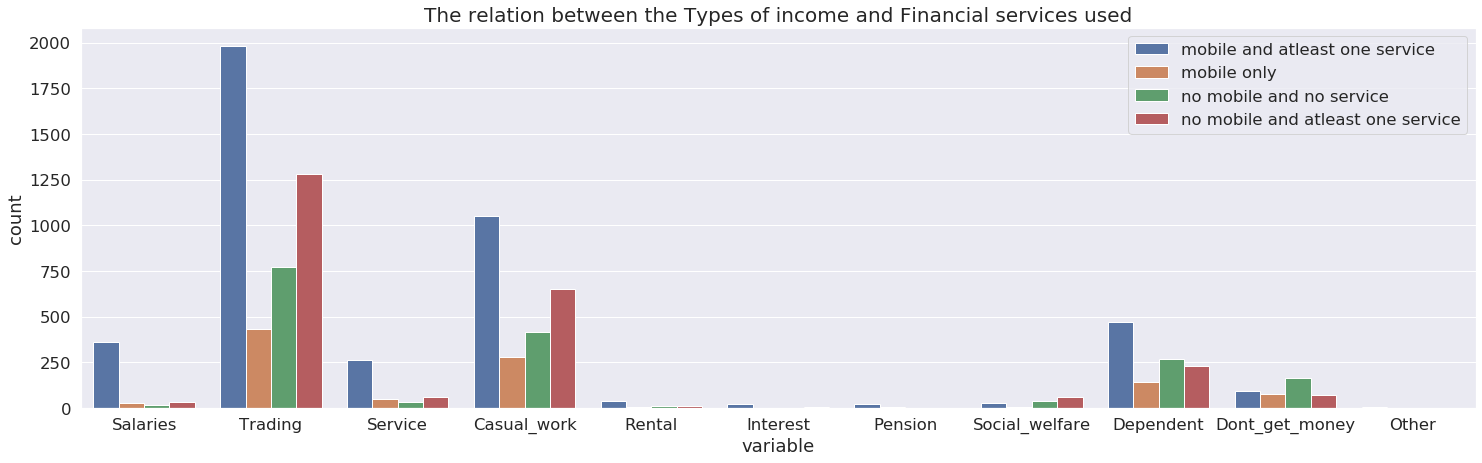

In [27]:
plt.figure(figsize=(25,7))
fontdict={'fontsize':20}
sns.set(font_scale=1.5)
sns.countplot(counts.variable,hue= 'mobile_money_classification',data =counts)
plt.legend(loc='upper right')
plt.title('The relation between the Types of income and Financial services used',fontdict=fontdict)
plt.show()

## How often are mobile money services used?

### How often  Mobile money services are used  and Age

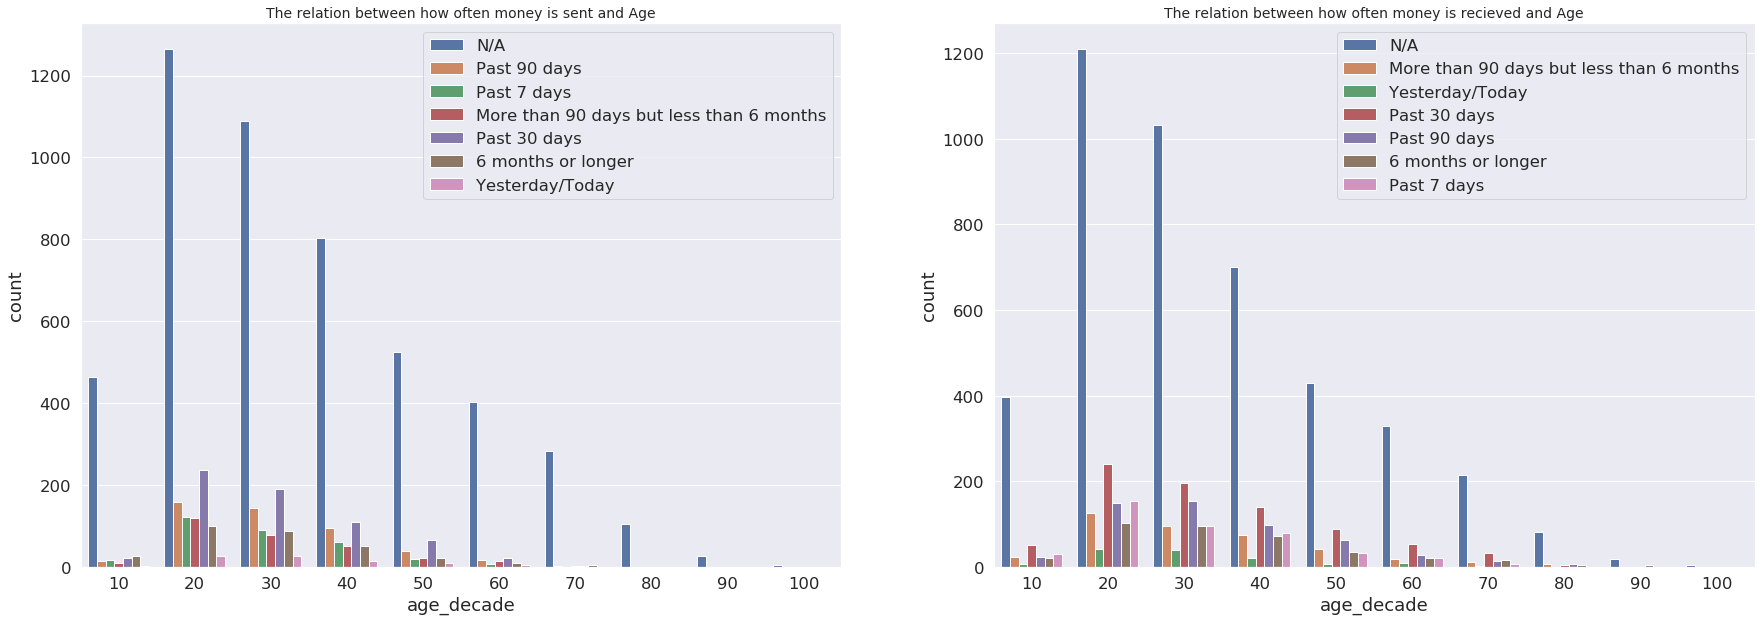

In [28]:
f, axes = plt.subplots(1, 2,figsize=(30, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1.5)
sns.countplot(x='age_decade',hue='sending_money_out_date',data=tanz, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=tanz,ax =axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and Age',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Age',fontdict=fontdict)
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

###  How often  Mobile money services are used  and Gender

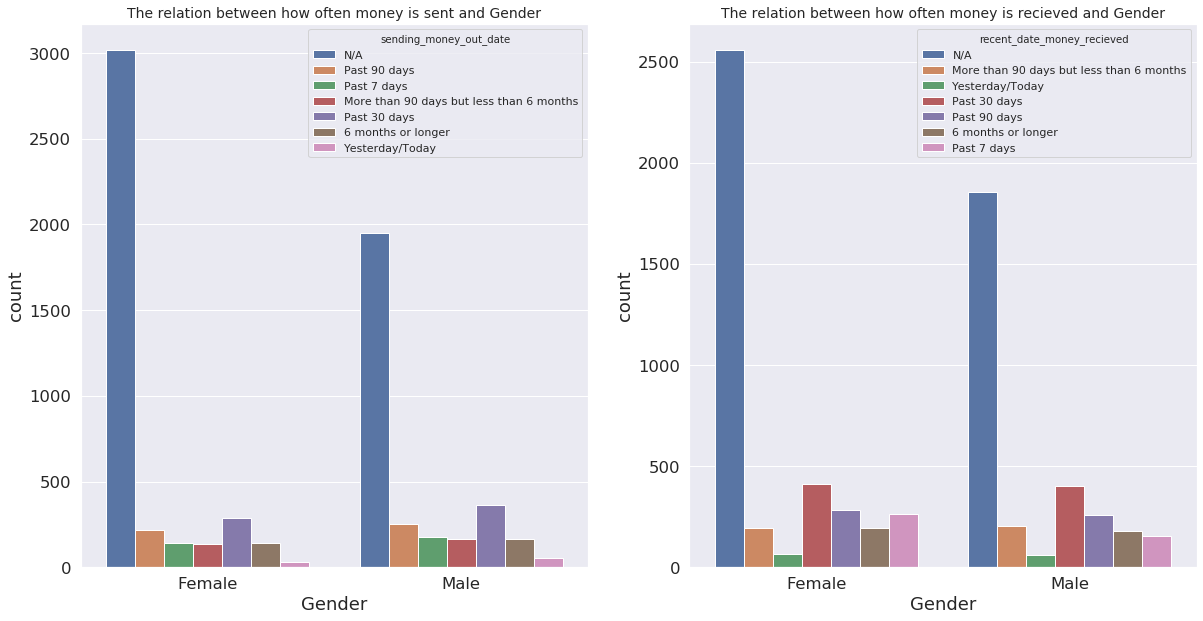

In [29]:
f, axes = plt.subplots(1, 2,figsize=(20, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Gender',hue='sending_money_out_date',data=tanz, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=tanz,ax = axes[1])
axes[0].set_title('The relation between how often money is sent and Gender',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Gender',fontdict=fontdict)
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

###   How often  Mobile money services are used and Maritul status


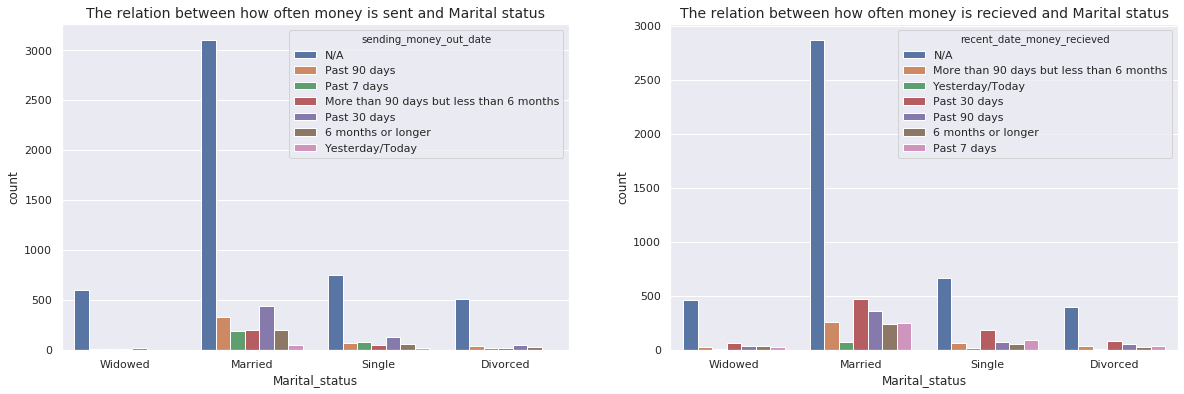

In [30]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Marital status',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Marital status',fontdict=fontdict)
fontdict={'fontsize': 20,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
plt.show()


*Mostly married people sent and recieved money in the past 30 days.*

### How often  Mobile money services are used  and Land ownership

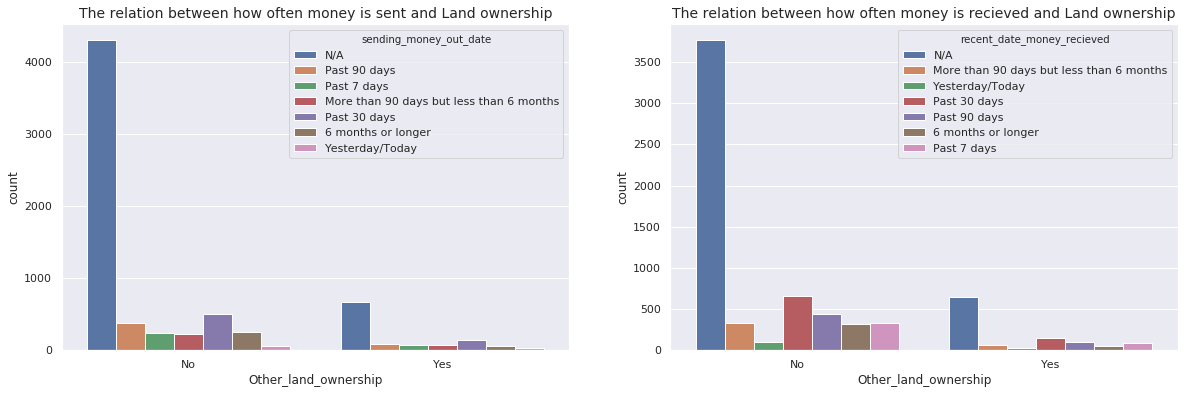

In [31]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Land ownership',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Land ownership',fontdict=fontdict)
plt.show()


### How often  Mobile money services are used  and  the Type of income

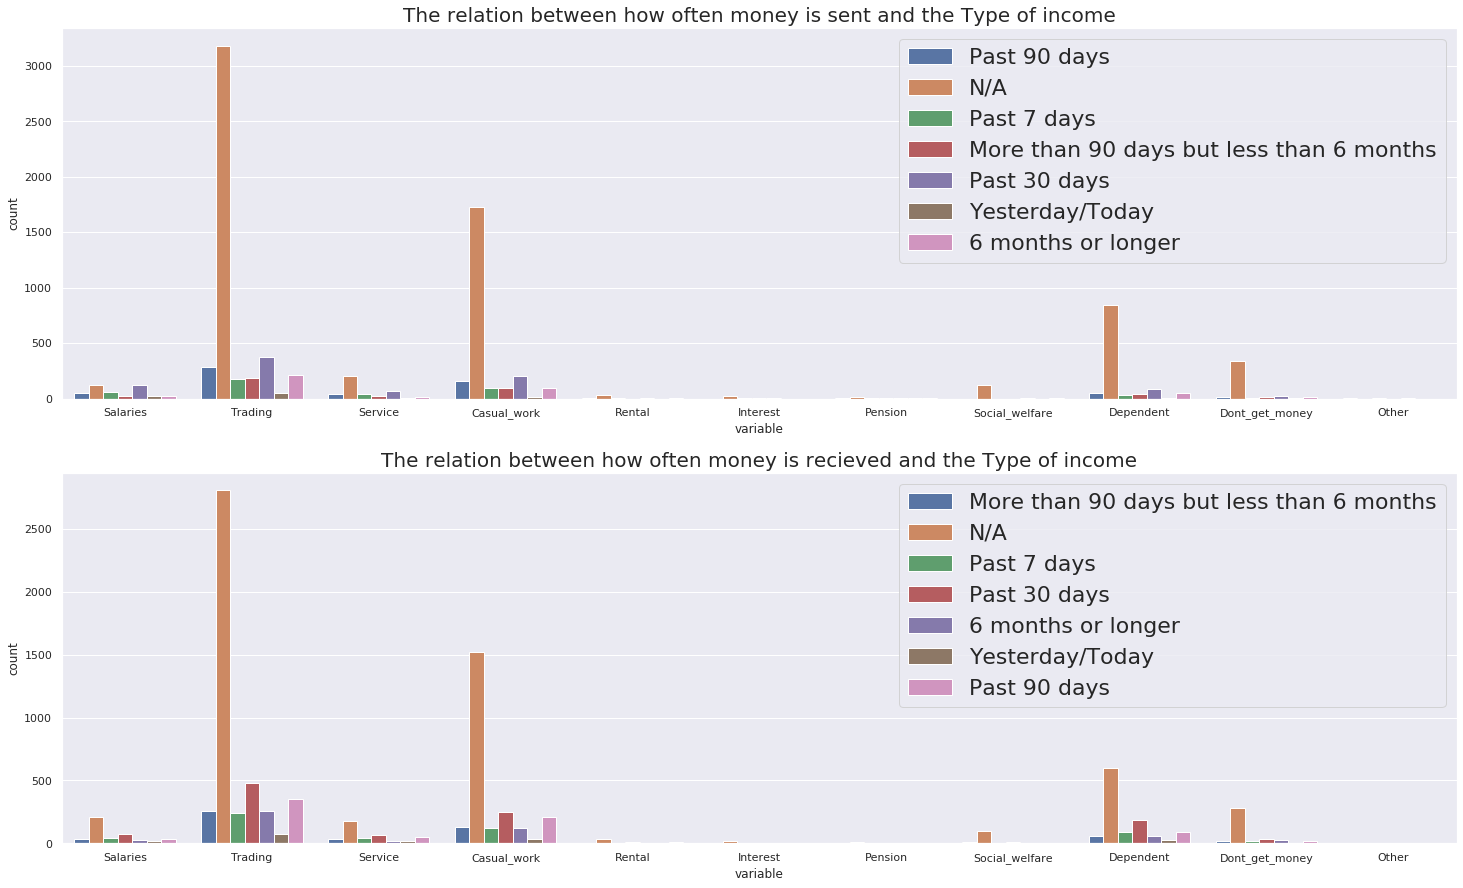

In [32]:
f, axes = plt.subplots(2, 1,figsize=(25, 15))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and the Type of income',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and the Type of income',fontdict=fontdict)

plt.show()

## 6.Demographic factors associated with mobile money

In [33]:
a = {1:'Yes',2:'No'}
tanz['Owning_a_mobile_phone']=tanz.Owning_a_mobile_phone.map(a)

In [34]:
b ={-1:'N/A',1:'crops',2:'livestock product',3:'livestock',4:'aquaculture',
            5:'Agriculture products',6:'Non agriculture',7:'crafts',8:'collection',9:'processed',10:'other'}
tanz['Product_sold']=tanz.Product_sold.map(b)

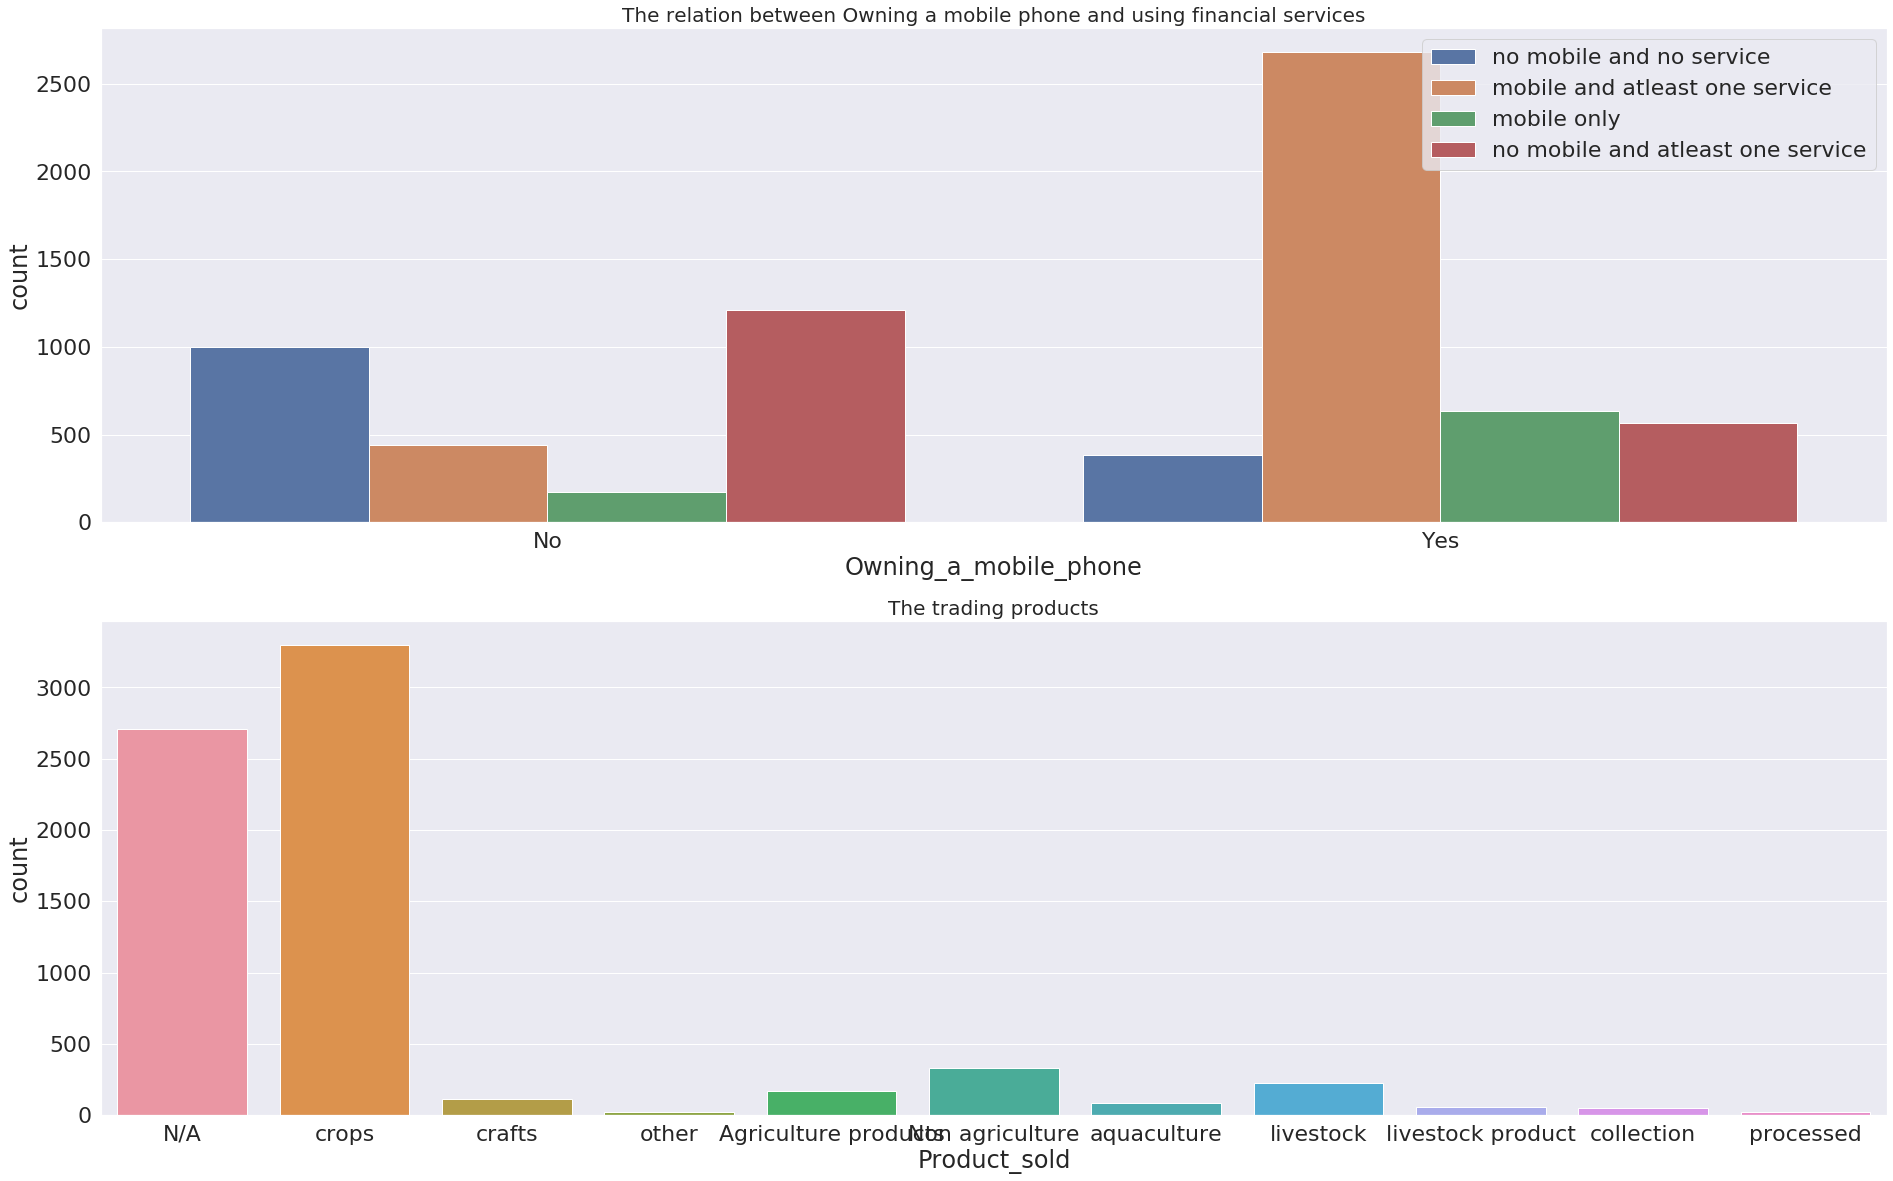

In [35]:
f, axes = plt.subplots(2, 1,figsize=(32, 20))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=tanz,ax=axes[0])
sns.countplot(x='Product_sold',data=tanz,ax= axes[1])
axes[0].legend(loc='upper right')
axes[0].set_title('The relation between Owning a mobile phone and using financial services',fontdict=fontdict)
axes[1].set_title('The trading products',fontdict=fontdict)
plt.show()



In [36]:
c ={1:'no formal education',2:'some primary',3:'primary completed',
           4:'post primary',5:'some secondary',6:'higher education',7:'do not know'}
tanz['Level_of_education']=tanz.Level_of_education.map(c)

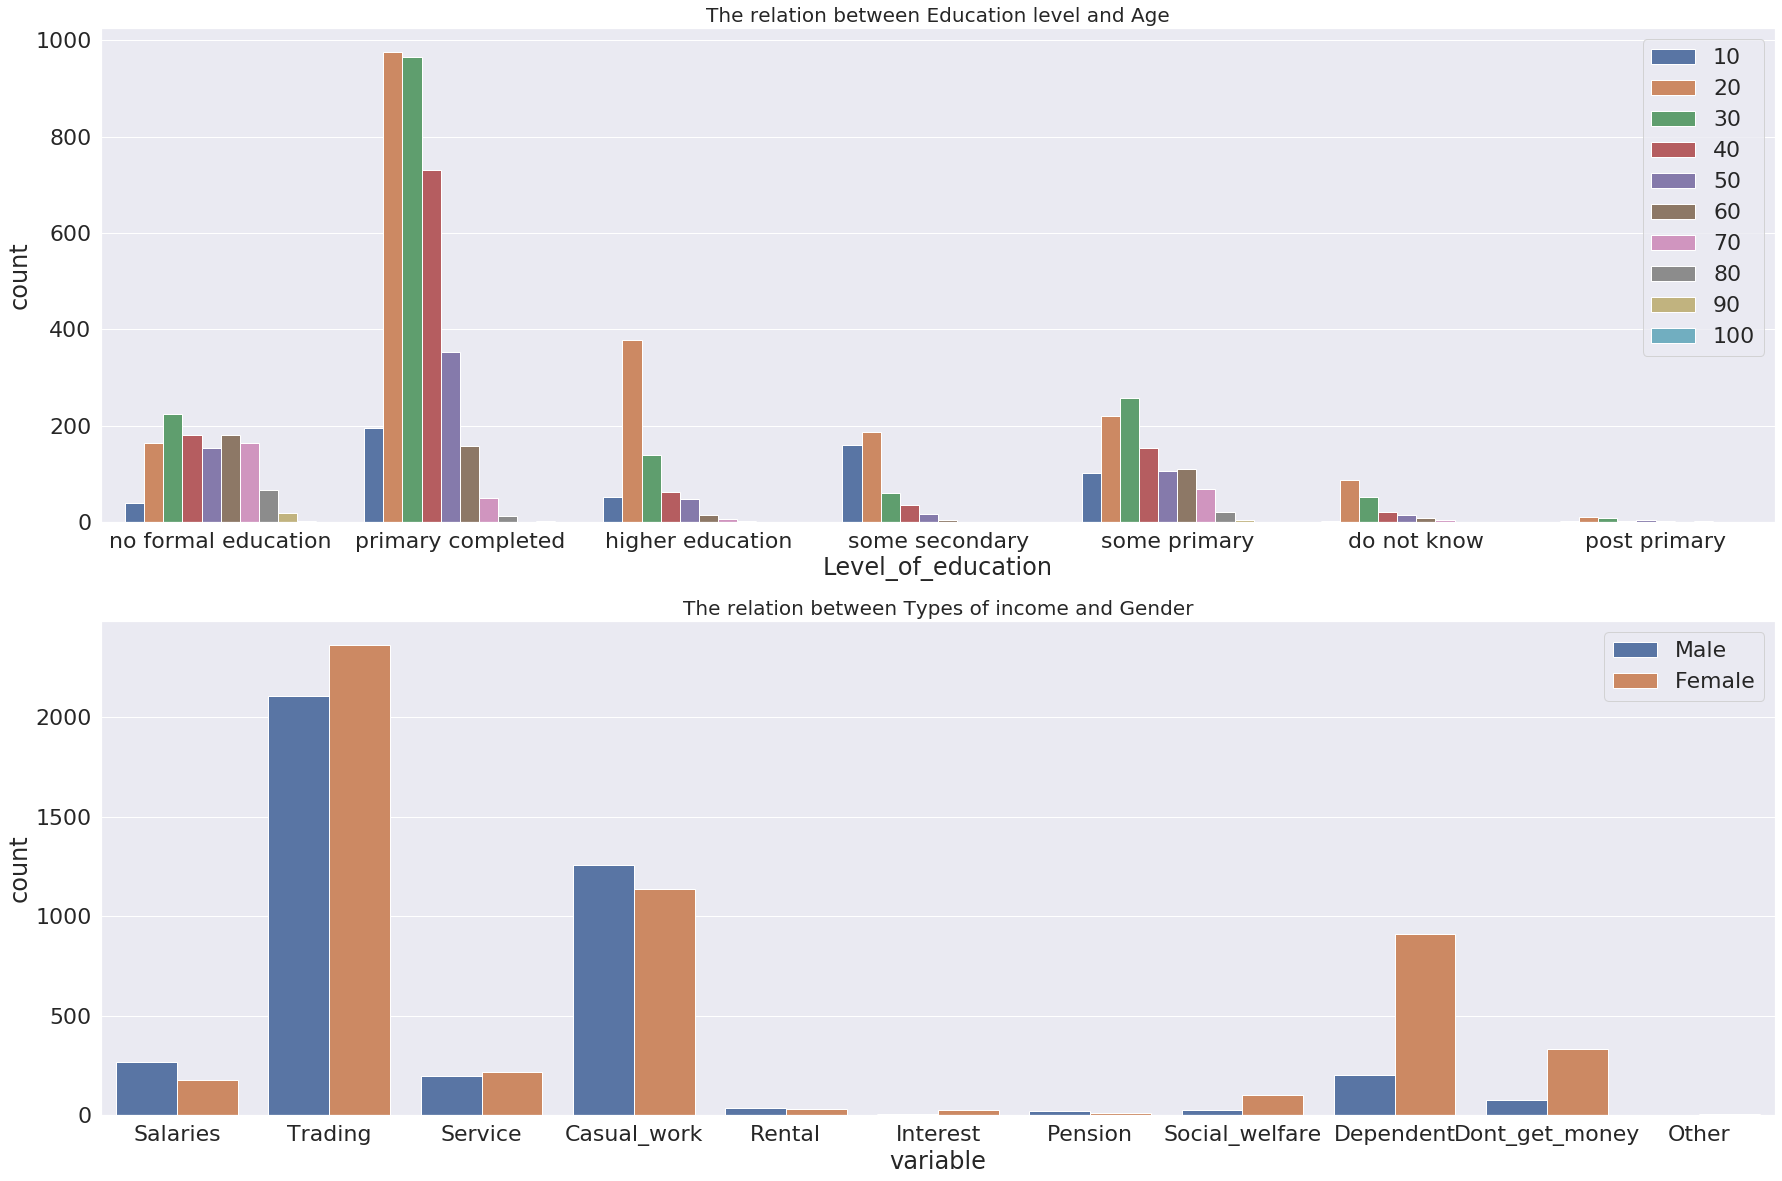

In [37]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize':20}
sns.set(font_scale=2)
sns.countplot(x='Level_of_education',hue='age_decade',data=tanz,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between Education level and Age',fontdict=fontdict)
axes[1].set_title('The relation between Types of income and Gender',fontdict=fontdict)
plt.show()

In [38]:
trading_data = tanz[(tanz["mobile_money"] == 1) & (tanz["Trading"] == 1) | (tanz["Casual_work"] == 1)  | (tanz["Salaries"] == 1) |(tanz["Service"] == 1)  |(tanz["Rental"] == 1) |(tanz["Interest"] == 1) |(tanz["Pension"] == 1)|(tanz["Social_welfare"] == 1)|(tanz["Dependent"] == 1)|(tanz["Dont_get_money"] == 1)|(tanz["Other"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)

trading_map

### What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

Market Segment

Out of the 7094 respondents:
3132 people use mobile money plus additional services
1778 people only use the services of mobile money but no have mobile mobile application
1386 people do not use mobile money at all, while the remaining 
804 have mobile money only without additional services

Age:

Most people that use mobile money only are between 20-24, while people within the 15 -19 are the one who do not have mobile mobile.
One can conclude that young adults are the one who uses mobile money

Gender:

77.4% of males use mobile money vs 69.7% of females use mobile money

Marital status:

Marital status does not seem to play any significant role in determining if a person will be a mobile money user or not. We see 74.5% people who are married use mobile money while
Single people are not far off with 74.4% and divorced sitting at 70.4 % and the minority being 
Widows only represented by 65.8%

From our map we are able to identify how our map we can clearly see that most of the people that use mobile money live by the costal are and their main source of income is by trading. and most people that use mobile money are female, married people and a lot of youth (this are people in the ages between 25-35). Not a lot of people also use mobile money, factors also might be that do not recieve income, do not have people to send or recieve money from using the services. few of elder people participate in the utilising of mobile money this mightbe that they have children and family members that send them money through mobile money.